# MAGNET Network Extraction

The MAGNET algorithm uses the traditional medial axis approach for extracting a network from an image. It makes use of the skeleton by locating pores as the junctions or endpoints of the skeleton. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import openpnm as op

import porespy as ps

ps.visualization.set_mpl_style()
np.random.seed(10)

## Generate an Image

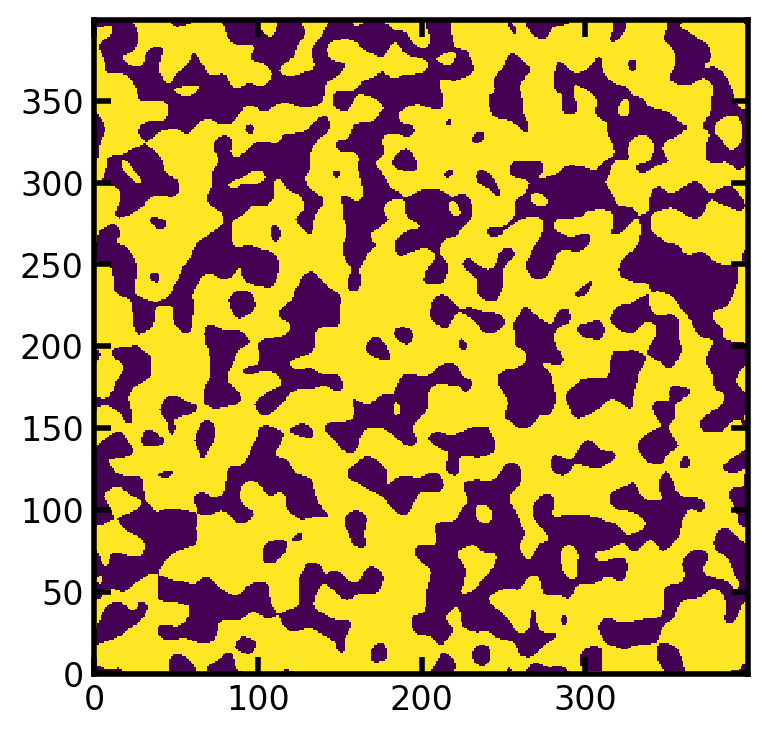

In [2]:
im = ps.generators.blobs(shape=[400, 400], porosity=0.6, blobiness=2)
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(im);

MAGNET uses a series of filters to extract a pore network but porespy has one function that does all this work for you!

In [3]:
magnet_output = ps.networks.magnet(im, voxel_size=1)

/Users/jeffgostick/Library/CloudStorage/Dropbox/Flash Sync/Code/Git/PoreSpy/src/porespy/networks/_magnet.py:248: FutureWarning: `skeletonize_3d` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.morphology.skeletonize` instead.
  sk = skeletonize(im).astype('bool')


The magnet function returns an object that has a network attribute. This is a dictionary that is suitable for loading into OpenPNM. The best way to get this into OpenPNM is to use the PoreSpy IO class. This splits the data into a network and a geometry:

In [4]:
pn = op.io.network_from_porespy(magnet_output.network)

As can be seen by printing the network it contains quite a lot of geometric information:

In [5]:
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Network at 0x177afe620>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  throat.conns                                                    243 / 243
  3  pore.coords                                                     217 / 217
  4  throat.actual_length                                            243 / 243
  5  throat.area                                                     243 / 243
  6  throat.max_diameter                                             243 / 243
  7  throat.min_diameter                                             243 / 243
  8  throat.avg_diameter                                             243 / 243
  9  throat.inscribed_diameter                                       243 / 243
 10 

You can also overlay the network on the image natively in porespy. Note that you need to transpose the image using im.T, since imshow uses matrix representation, e.g. a (10, 20)-shaped array is shown as 10 pixels in the y-axis, and 20 pixels in the x-axis.

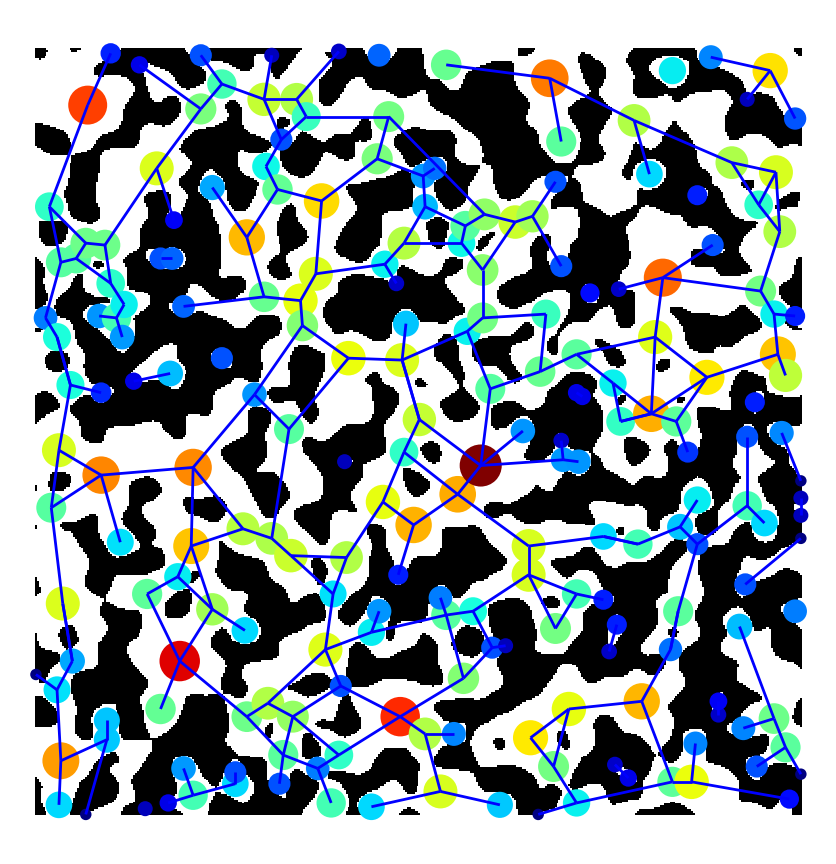

In [6]:
fig, ax = plt.subplots(figsize=[5, 5])
ax.imshow(im.T, cmap=plt.cm.bone)
op.visualization.plot_coordinates(
    ax=fig,
    network=pn,
    size_by=pn["pore.inscribed_diameter"],
    color_by=pn["pore.inscribed_diameter"],
    markersize=200,
)
op.visualization.plot_connections(network=pn, ax=fig)
ax.axis("off");